# Импорт библиотек

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats


# Загрузка датасета

In [3]:
df = pd.read_excel('DS_dataset.xlsx')
df

,Фамилия Имя,Возраст игрока,Национальность,Позиция на поле,Лига,Клуб,Стоимость,Турнир,Минут на поле в розыгрыше,Голы,Голевые пасы,Голы+голевые пасы,Прогресивный перенос,Прогрессивный пас,Прогресивные пасы не дошедшие до получателя
0,Kylian Mbappé,25,Франция,Центральный нап.,Лига 1,Пари Сен-Жермен,180,Лига Чемпионов,900,8,0,8,65,56,125
1,Erling Haaland,23,Норвегия,Центральный нап.,АПЛ,Манчестер Сити,180,Лига Чемпионов,776,6,1,7,7,11,43
2,Jude Bellingham,20,Англия,Атак. полузащитник,Ла лига,Реал Мадрид,180,Лига Чемпионов,742,4,4,8,29,56,56
3,Bukayo Saka,22,Англия,Правый Вингер,АПЛ,Арсенал,130,Лига Чемпионов,720,4,4,8,41,22,89
4,Phil Foden,23,Англия,Правый Вингер,АПЛ,Манчестер Сити,130,Лига Чемпионов,681,5,4,9,23,53,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Thomas Partey,30,Гана,Опорный полузащитник,АПЛ,Арсенал,20,Лига Чемпионов,5,0,0,0,0,1,0
192,Fredrik Aursnes,28,Норвегия,Опорный полузащитник,annother leage,Бенфика,20,Лига Чемпионов,540,0,1,1,10,24,37
193,Noah Okafor,23,Швейцария,Центральный нап.,Серия А,Милан,20,Лига Чемпионов,36,0,1,1,3,2,3
194,Carlos Augusto,25,Бразилия,Левый полузащитник,annother leage,Интернационале,20,Лига Чемпионов,475,0,0,0,13,15,20


# Предобработка данных

## Обработка пропусков

In [4]:
df.isna().sum()

Фамилия Имя                                    0
Возраст игрока                                 0
Национальность                                 0
Позиция на поле                                0
Лига                                           0
Клуб                                           0
Стоимость                                      0
Турнир                                         0
Минут на поле в розыгрыше                      0
Голы                                           0
Голевые пасы                                   0
Голы+голевые пасы                              0
Прогресивный перенос                           0
Прогрессивный пас                              0
Прогресивные пасы не дошедшие до получателя    0
dtype: int64

Пропусков нет

## Проверка типов

In [5]:
df.dtypes

Фамилия Имя                                    object
Возраст игрока                                  int64
Национальность                                 object
Позиция на поле                                object
Лига                                           object
Клуб                                           object
Стоимость                                       int64
Турнир                                         object
Минут на поле в розыгрыше                       int64
Голы                                            int64
Голевые пасы                                    int64
Голы+голевые пасы                               int64
Прогресивный перенос                            int64
Прогрессивный пас                               int64
Прогресивные пасы не дошедшие до получателя     int64
dtype: object

Типы в порядке 

## Переименование столбцов

In [9]:
df.columns = ['full_name', 'age', 'nationality', 'position', 
              'league', 'club', 'price', 'turnament', 'play_time', 
              'goals', 'goal_passes', 'goals_goal_passes', 
              'progress_turnovers', 'progress_pass', 'not_recieved_progress_passes']


## Проверка конкретных значений

Хорошая практика, посмотреть нет ли в категориальных данных похожих строк или строк с ошибками по типу: "дерево" и "дериво"

In [13]:
df.head()

,full_name,age,nationality,position,league,club,price,turnament,play_time,goals,goal_passes,goals_goal_passes,progress_turnovers,progress_pass,not_recieved_progress_passes
0,Kylian Mbappé,25,Франция,Центральный нап.,Лига 1,Пари Сен-Жермен,180,Лига Чемпионов,900,8,0,8,65,56,125
1,Erling Haaland,23,Норвегия,Центральный нап.,АПЛ,Манчестер Сити,180,Лига Чемпионов,776,6,1,7,7,11,43
2,Jude Bellingham,20,Англия,Атак. полузащитник,Ла лига,Реал Мадрид,180,Лига Чемпионов,742,4,4,8,29,56,56
3,Bukayo Saka,22,Англия,Правый Вингер,АПЛ,Арсенал,130,Лига Чемпионов,720,4,4,8,41,22,89
4,Phil Foden,23,Англия,Правый Вингер,АПЛ,Манчестер Сити,130,Лига Чемпионов,681,5,4,9,23,53,89


In [19]:
df.nationality.value_counts().sort_index()

nationality
Австрия                       4
Англия                       26
Аргентина                     6
Бельгия                       5
Бразилия                     18
Гана                          1
Германия                     16
Грузия                        1
Дания                         3
Испания                      19
Италия                        8
Камерун                       1
Канада                        1
Марокко                       5
Нигерия                       2
Нидерланды                   16
Норвегия                      4
Парагвай                      1
Польша                        2
Португалия                   15
Словакия                      2
Словения                      1
Соединенные Штаты Америки     3
Турция                        2
Украина                       1
Уругвай                       2
Франция                      24
Швейцария                     3
Швеция                        1
Шотландия                     1
Япония                      

In [20]:
df.position.value_counts().sort_index()

position
Атак. полузащитник      16
Вратарь                 10
Левый Вингер            23
Левый защитник          11
Левый полузащитник       1
Опорный полузащитник    18
Оттянутый нап.           2
Правый Вингер           18
Правый защитник         12
Правый полузащитник      1
Центр. защитник         37
Центр. полузащитник     30
Центральный нап.        17
Name: count, dtype: int64

In [21]:
df.league.value_counts().sort_index()

league
annother leage    31
АПЛ               60
Бундеслига        32
Ла лига           39
Лига 1            14
Серия А           20
Name: count, dtype: int64

видим лишь незначительную ошибку в написании одной из лиг, исправим

In [23]:
df.league = df.league.replace('annother leage', 'another league')
df.league.value_counts().sort_index()

league
another league    31
АПЛ               60
Бундеслига        32
Ла лига           39
Лига 1            14
Серия А           20
Name: count, dtype: int64

In [24]:
df.club.value_counts().sort_index()

club
Арсенал                17
Атлетико Мадрид         9
Бавария Мюнхен         15
Барселона              12
Бенфика                 5
Боруссия Дортмунд      11
Интернационале         10
Ланс                    2
Лацио                   2
Манчестер Сити         15
Манчестер Юнайтед      17
Милан                  12
Наполи                  6
Ньюкасл Юнайтед        11
ПСВ Эйндховен           6
Пари Сен-Жермен        12
Порту                   5
РБ Лейпциг              6
Реал Мадрид            10
Реал Сосьедад           8
Фейеноорд Роттердам     5
Name: count, dtype: int64

In [25]:
df.turnament.value_counts().sort_index()

turnament
Лига Чемпионов    196
Name: count, dtype: int64

Видим, что этот столбец содержит одинаковые данные, значит он не полезен ни для аналитики, ни для машинного обучения - удаляем

In [27]:
df = df.drop(columns=['turnament'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   full_name                     196 non-null    object
 1   age                           196 non-null    int64 
 2   nationality                   196 non-null    object
 3   position                      196 non-null    object
 4   league                        196 non-null    object
 5   club                          196 non-null    object
 6   price                         196 non-null    int64 
 7   play_time                     196 non-null    int64 
 8   goals                         196 non-null    int64 
 9   goal_passes                   196 non-null    int64 
 10  goals_goal_passes             196 non-null    int64 
 11  progress_turnovers            196 non-null    int64 
 12  progress_pass                 196 non-null    int64 
 13  not_recieved_progres

## Проверим дубликаты

In [29]:
df.duplicated().sum()

2

In [30]:
df = df.drop_duplicates()

## Выбросы

In [33]:
df.head()

,full_name,age,nationality,position,league,club,price,play_time,goals,goal_passes,goals_goal_passes,progress_turnovers,progress_pass,not_recieved_progress_passes
0,Kylian Mbappé,25,Франция,Центральный нап.,Лига 1,Пари Сен-Жермен,180,900,8,0,8,65,56,125
1,Erling Haaland,23,Норвегия,Центральный нап.,АПЛ,Манчестер Сити,180,776,6,1,7,7,11,43
2,Jude Bellingham,20,Англия,Атак. полузащитник,Ла лига,Реал Мадрид,180,742,4,4,8,29,56,56
3,Bukayo Saka,22,Англия,Правый Вингер,АПЛ,Арсенал,130,720,4,4,8,41,22,89
4,Phil Foden,23,Англия,Правый Вингер,АПЛ,Манчестер Сити,130,681,5,4,9,23,53,89


In [59]:
df.play_time.value_counts().sort_index()

play_time
1      1
5      1
11     1
19     1
36     1
      ..
838    1
888    1
900    3
901    1
930    2
Name: count, Length: 160, dtype: int64

<Axes: >

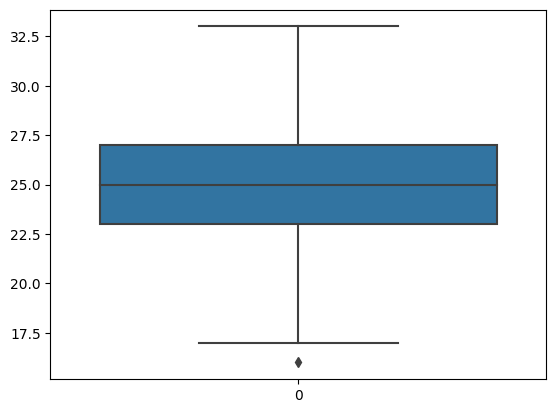

In [32]:
sns.boxplot(df.age)

<Axes: >

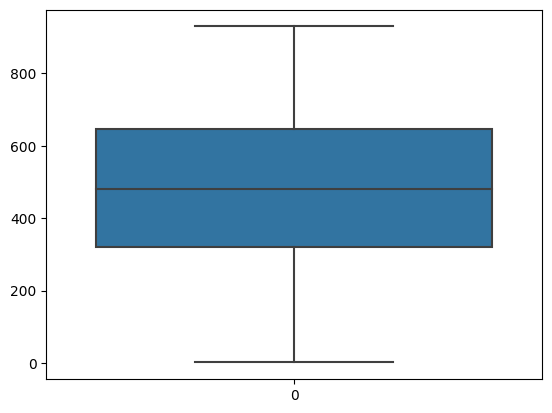

In [34]:
sns.boxplot(df.play_time)

<Axes: >

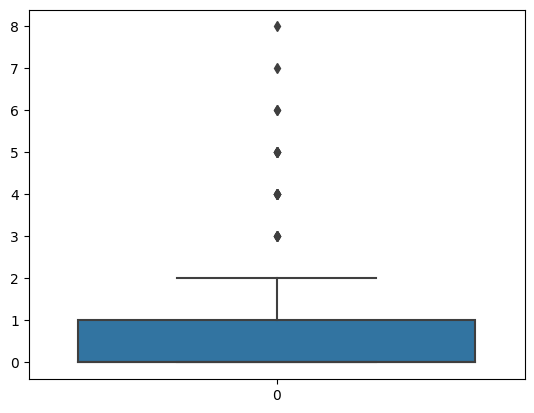

In [35]:
sns.boxplot(df.goals)

<Axes: >

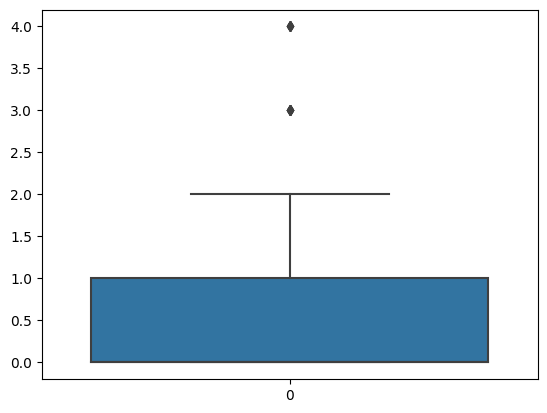

In [37]:
sns.boxplot(df.goal_passes)

<Axes: >

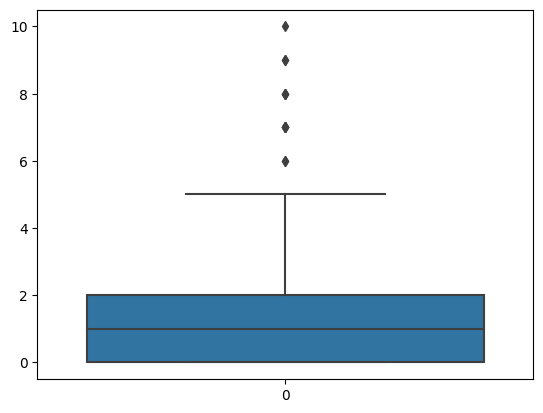

In [38]:
sns.boxplot(df.goals_goal_passes)

<Axes: >

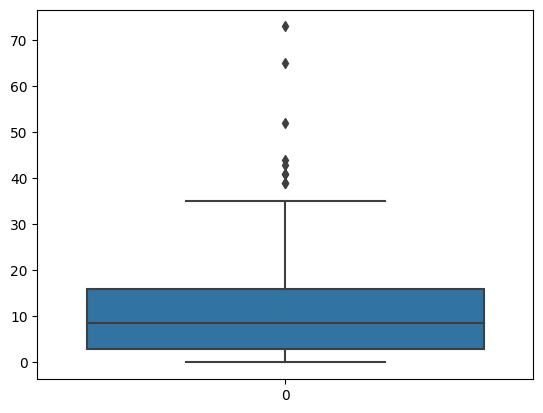

In [39]:
sns.boxplot(df.progress_turnovers)

<Axes: >

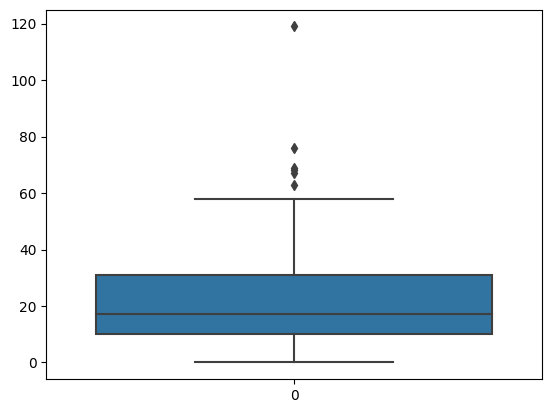

In [40]:
sns.boxplot(df.progress_pass)

<Axes: >

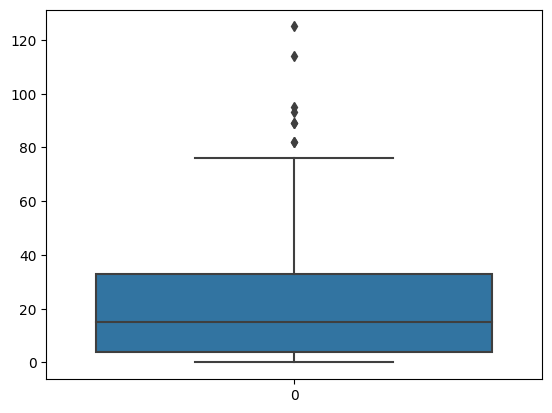

In [41]:
sns.boxplot(df.not_recieved_progress_passes)

По статистикам пассов и голов видим много выбивающихся значений, но они не являются выбивающимися по логике датасета, при наличии конкретного целевого столбца для машинного обучения можно будет их убрать, если это будет нужно для корректной работы модели

# Проанализируем числовые столбцы

[(0.0, 50.0)]

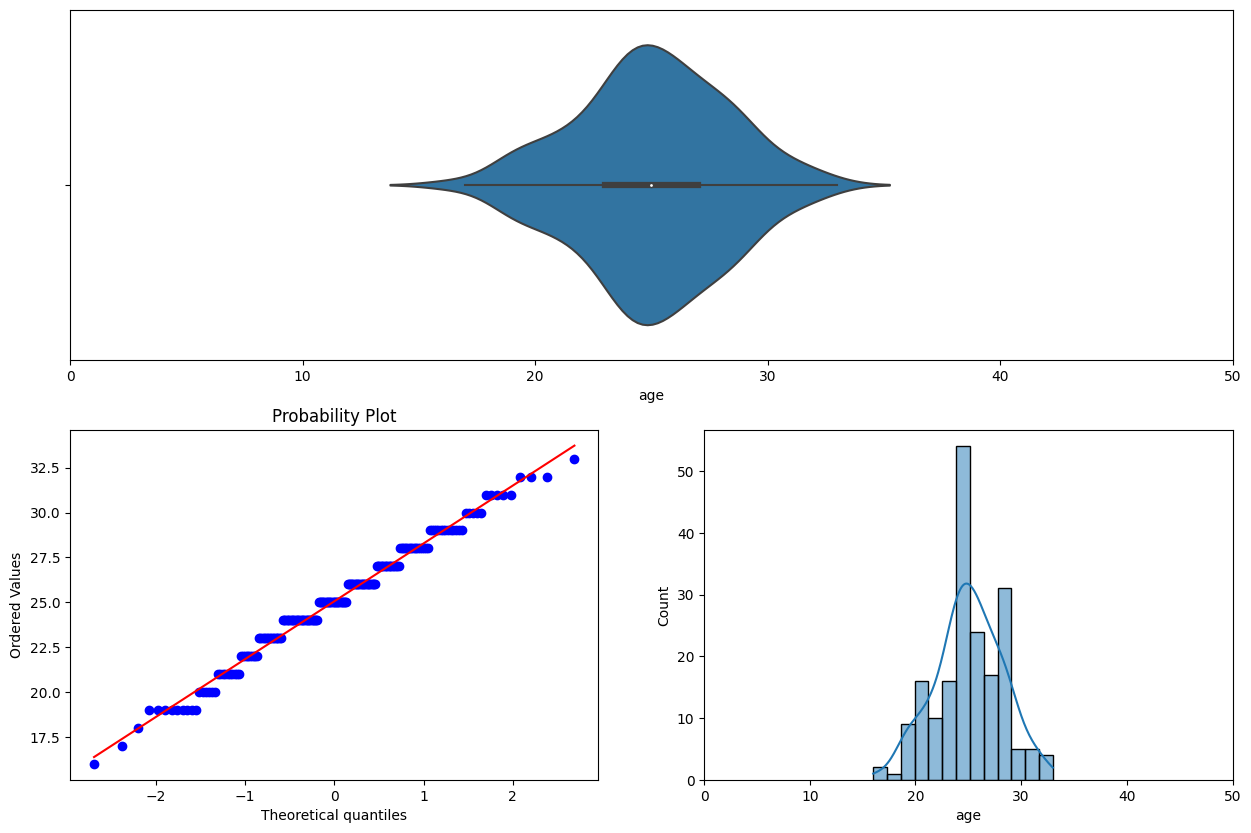

In [50]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['age'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 50))
stats.probplot(df['age'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['age'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 50))

Видим что основная доля футболистов около 50% имеют возраст от 20 до 30 лет, выборка не очень похожа на нормальную, нет слишком старых и слишком молодых людей, которым отводится 2% - 5%. А данные конкретно имеют дискретное распределение, где дисперсия константа, а на каждое число приходится довольно много значений.

[(0.0, 1250.0)]

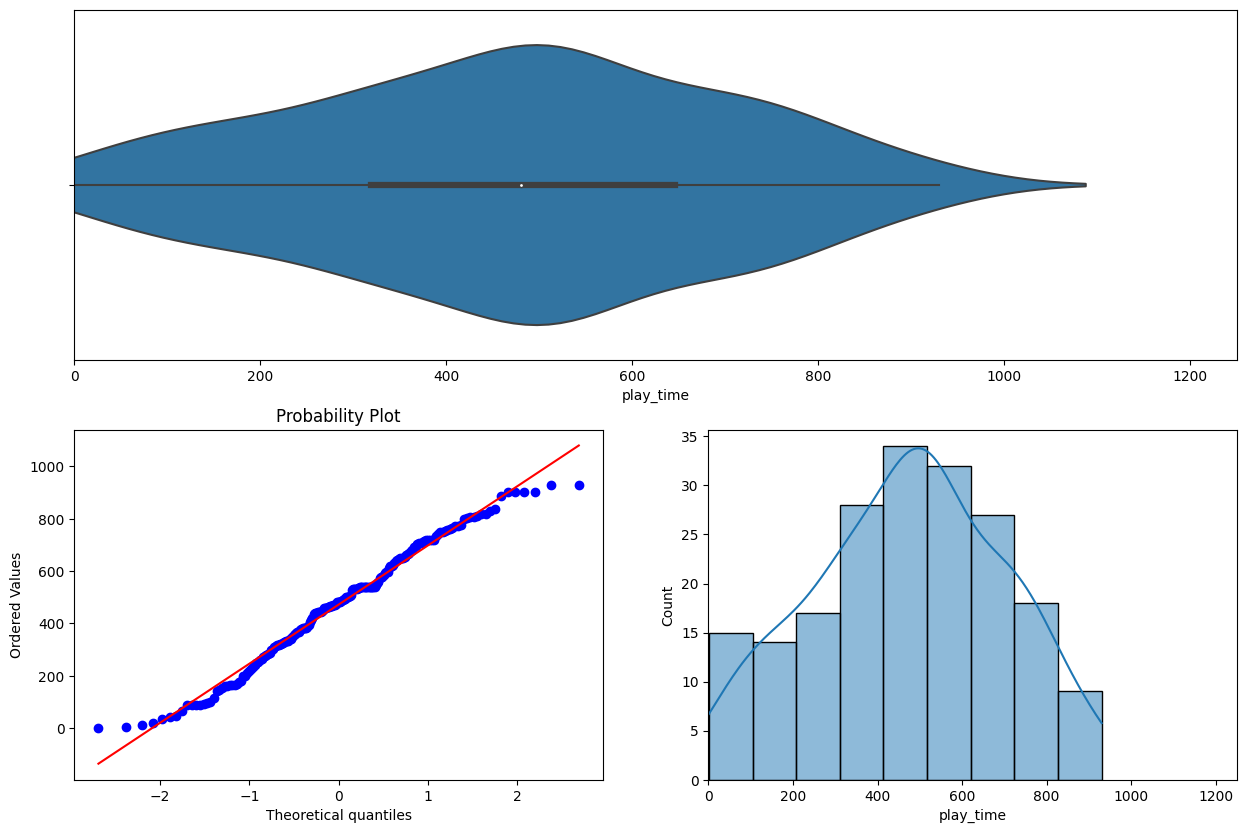

In [60]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['play_time'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 1250))
stats.probplot(df['play_time'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['play_time'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 1250))

Количество минут игры у основного количества футболистов (50%) - от 300 до 700, распределение уже очень похоже на нормальное, столбец будет очень удобен для работы алгоритмов машинного обучения. Однако достаточно у многих игрков время игры меньше 100, то есть в исследовании присудствуют игроки, которые только недавно вступили в клуб

[(0.0, 10.0)]

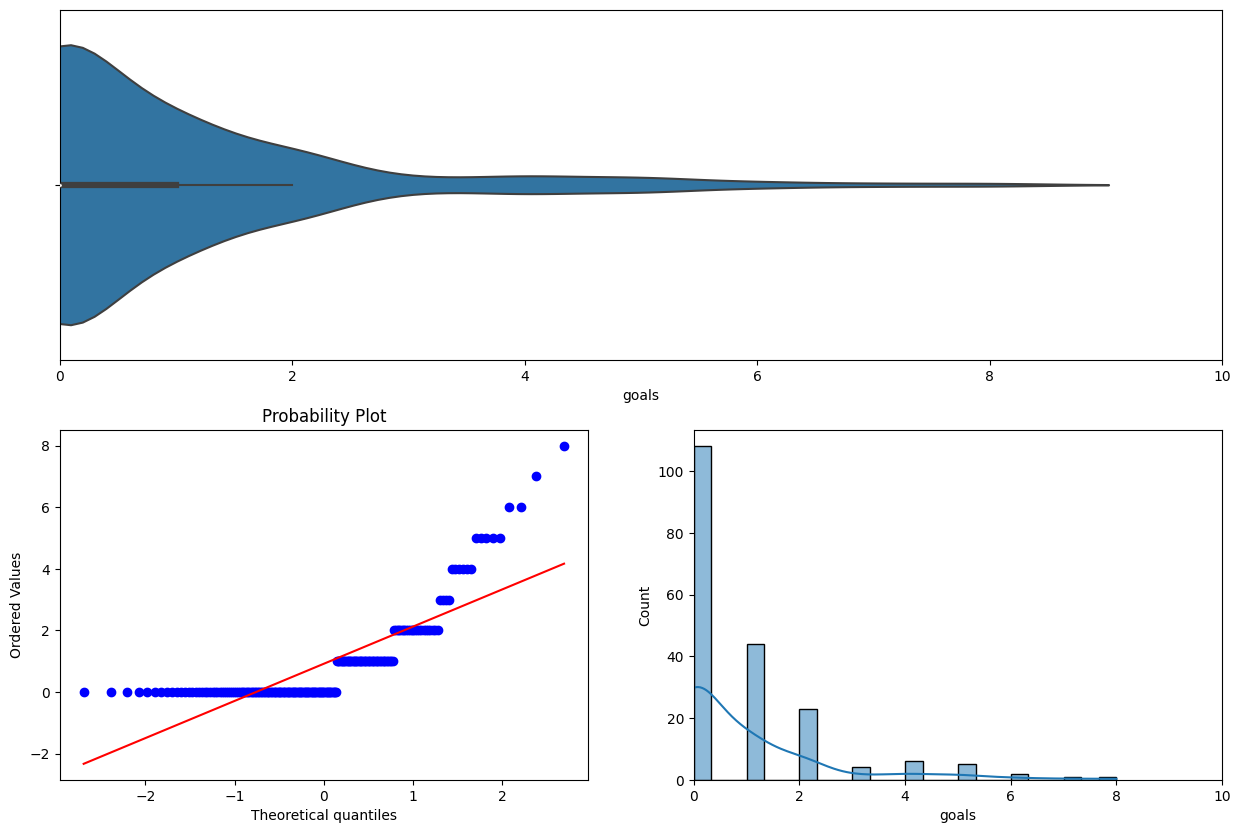

In [62]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['goals'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 10))
stats.probplot(df['goals'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['goals'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 10))

Распределение голов похоже на экспоненциальное распределение - это логично, так как голы забивают в основном нападающие

[(0.0, 5.0)]

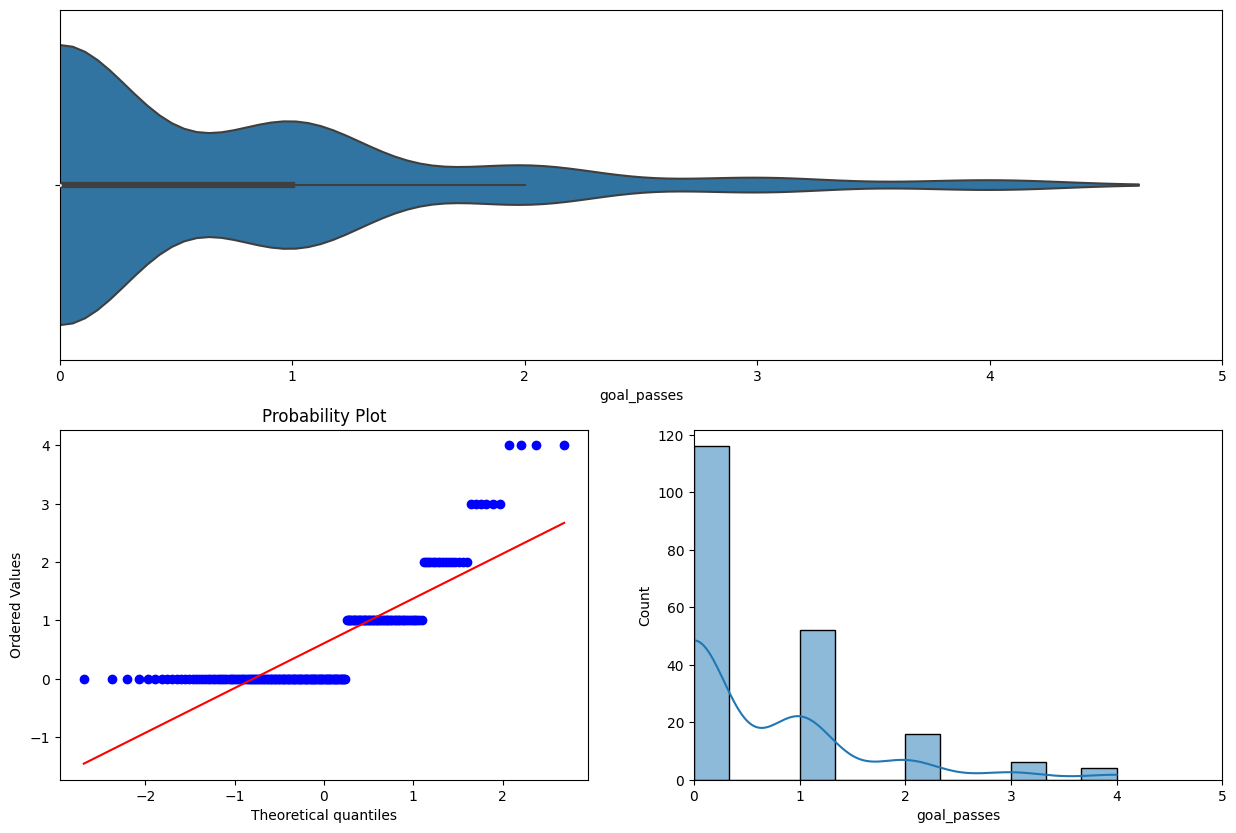

In [70]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['goal_passes'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 5))
stats.probplot(df['goal_passes'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['goal_passes'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 5))

С пассами, которые предшествовали голу та же ситуация - распределения практически идентичные, видимо защитники и вратари совсем не дают выгрышные пассы 

[(0.0, 90.0)]

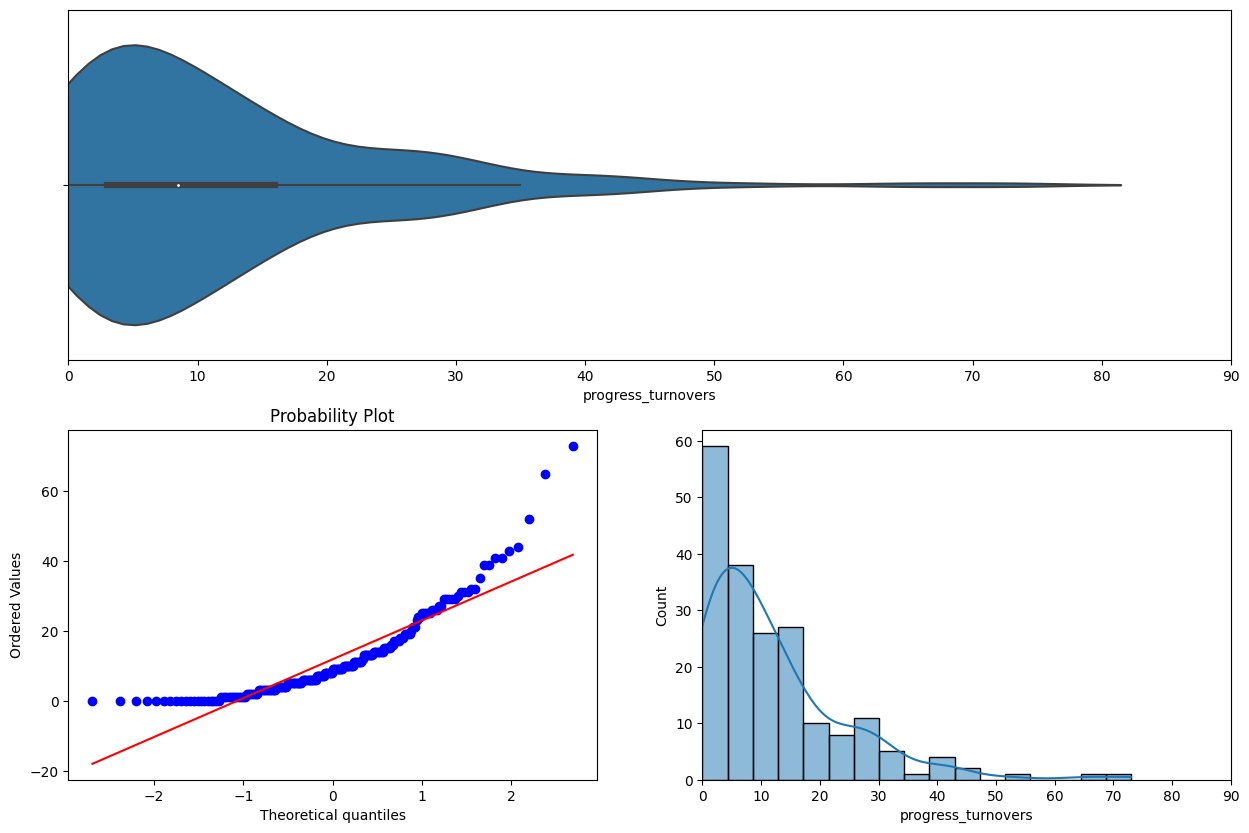

In [75]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['progress_turnovers'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 90))
stats.probplot(df['progress_turnovers'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['progress_turnovers'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 90))

[(0.0, 90.0)]

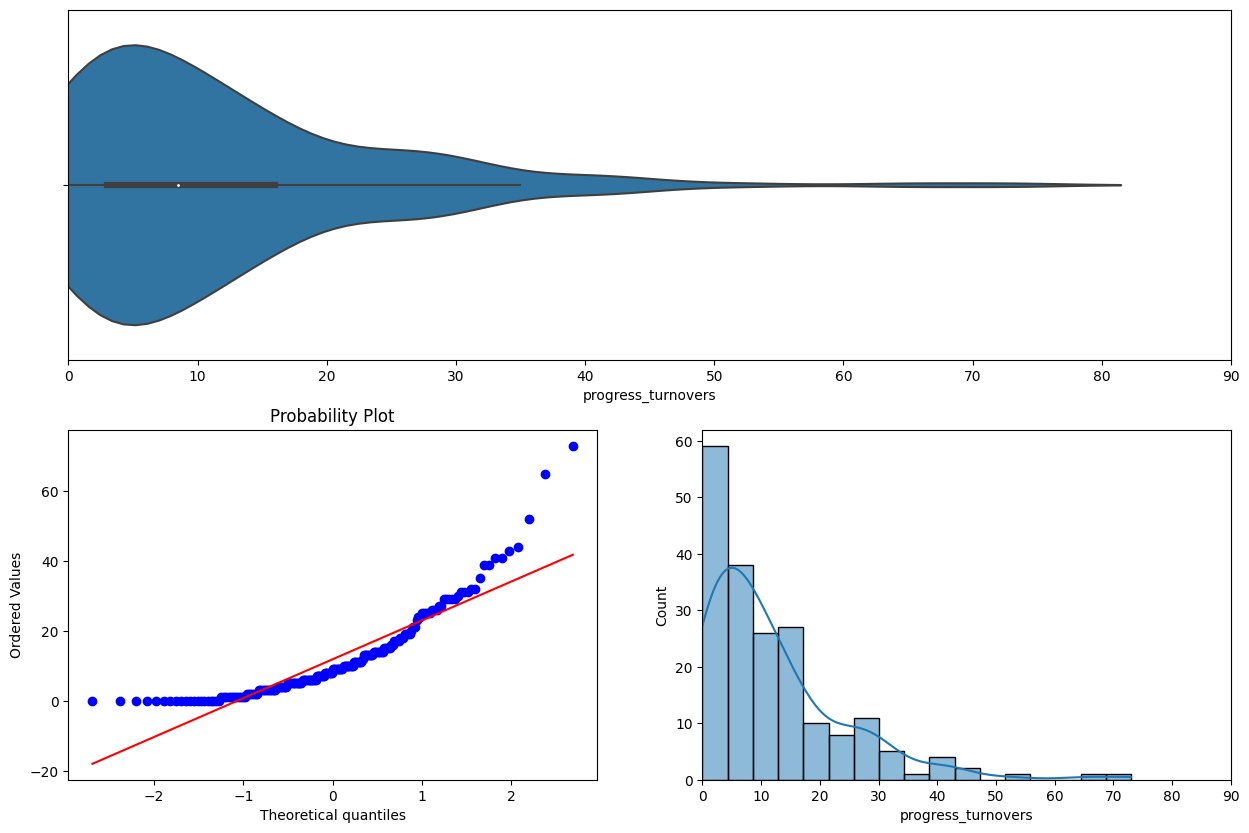

In [76]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['progress_turnovers'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 90))
stats.probplot(df['progress_turnovers'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['progress_turnovers'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 90))

[(0.0, 140.0)]

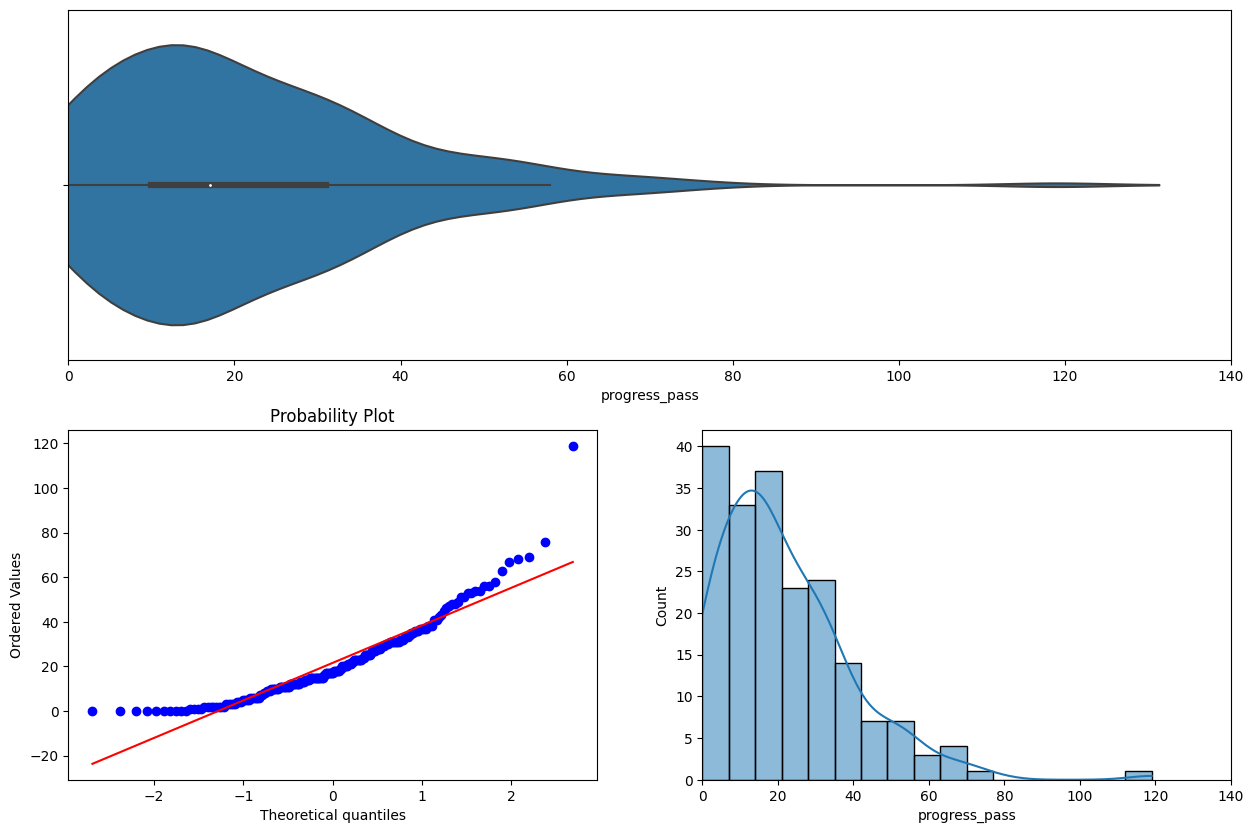

In [82]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['progress_pass'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 140))
stats.probplot(df['progress_pass'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['progress_pass'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 140))

[(0.0, 150.0)]

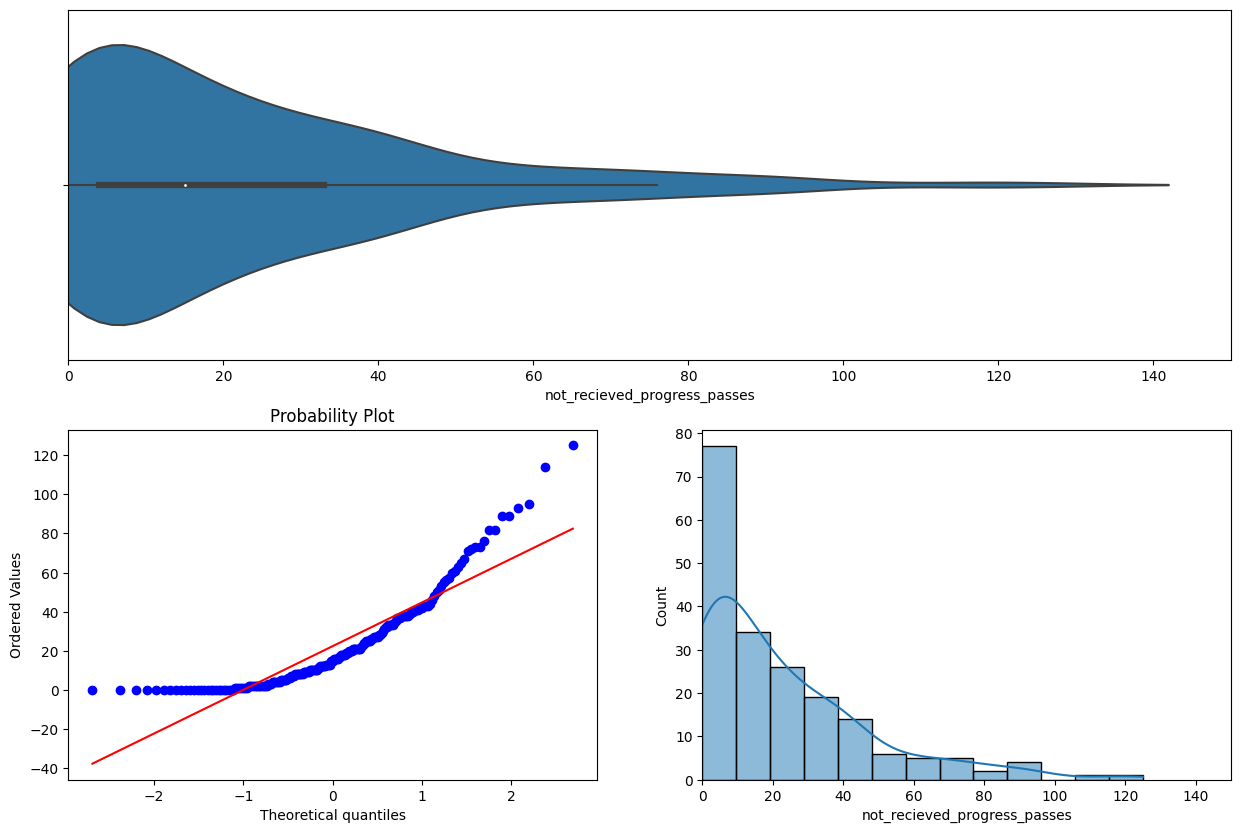

In [85]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=df['not_recieved_progress_passes'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 150))
stats.probplot(df['not_recieved_progress_passes'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=df['not_recieved_progress_passes'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 150))

С прогрессивными пасами и переносами то же самое, в основном это касается нападающих, но прогрессивных пасов будет больше, так как по распределению видно, что игроков с околонулевым значением пасов очень много, но и с значениями около 20 практически столько же

# Посмотрим корреляцию

<Axes: >

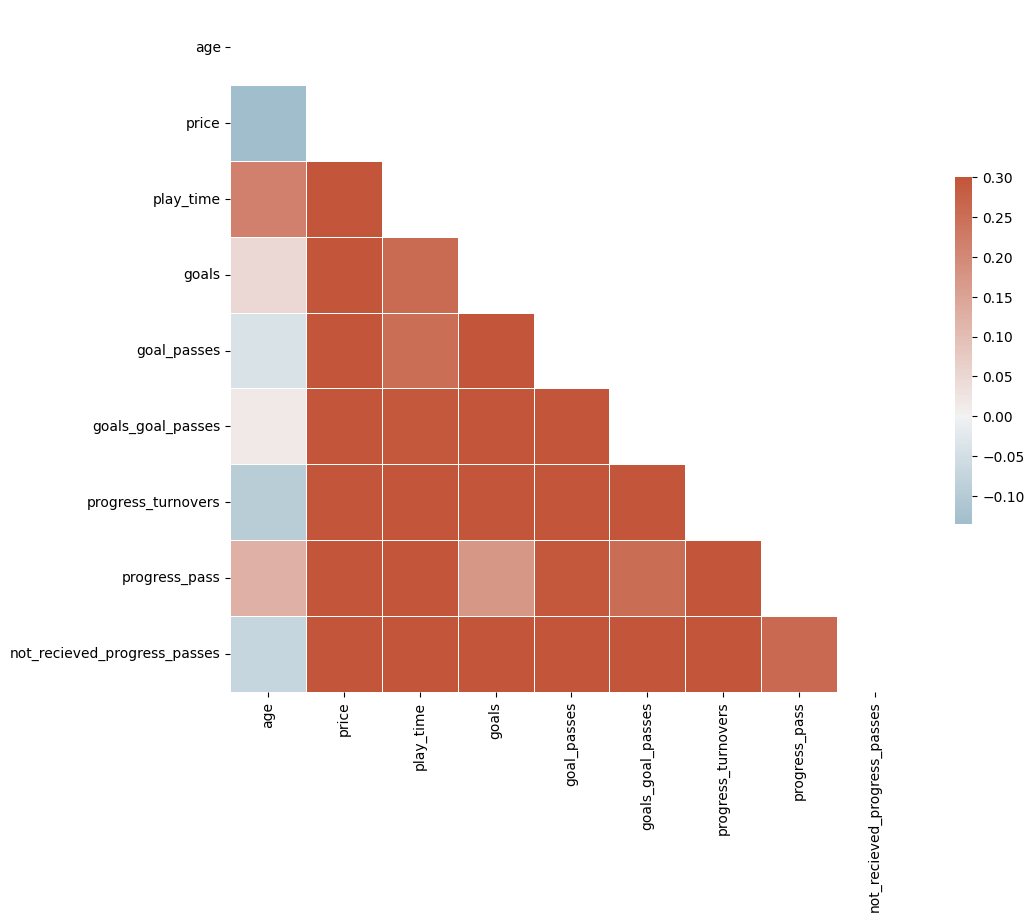

In [87]:
corr = df.select_dtypes(exclude=['object']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Смотрим корреляцию по формуле Спирмана, это будет корреляция числовых данных. В данном датасете положительная корреляция только у возраста с пасами и ценой, это достаточно логично, от возраста зависит качество игры футболиста и его цена, остальные данные имеют выраженную отрицательную корреляцию, она тоже бывает иногда полезна в анализе факторов, которые отрицательно влияют друг на друга